### **HR Employee Attrition Analysis (Descriptive + Predictive)**

This project analyzes employee attrition using both **descriptive statistics** and **predictive modeling**. 
The descriptive dashboard (Excel) visualizes HR trends across departments, overtime, job satisfaction, and other features.

The predictive analysis uses **Logistic Regression** to estimate attrition probability and identify key drivers.
Visualizations and feature importance charts highlight actionable insights for workforce management.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv(r"C:\Users\shrey\Downloads\hr attrition.csv")

In [4]:
df.columns = df.columns.str.replace(" ", "")

In [5]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [8]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

C:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [9]:
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8775510204081632

Confusion Matrix:
 [[362   8]
 [ 46  25]]

Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.98      0.93       370
         Yes       0.76      0.35      0.48        71

    accuracy                           0.88       441
   macro avg       0.82      0.67      0.71       441
weighted avg       0.87      0.88      0.86       441



### Model Evaluation

- **Accuracy:** 0.87
  
- **Precision:**
   - No (Stayed) - 0.89
   - Yes (Left) - 0.76

- **Recall:**
   - No (Stayed) - 0.98
   - Yes (Left) - 0.35

- **F1 Score:**
    - No (Stayed) - 0.93
    - Yes (Left) - 0.48

**Interpretation:**

The model is very good at predicting employees who **stay** (No) but less accurate at predicting employees who **leave** (Yes). This is expected due to **class imbalance** in HR attrition data-far fewer employees leave than stay.
Even so, the model provides valuable insights into **key drivers of attrition** like OverTime, Job Satisfaction, and role-specific factors.

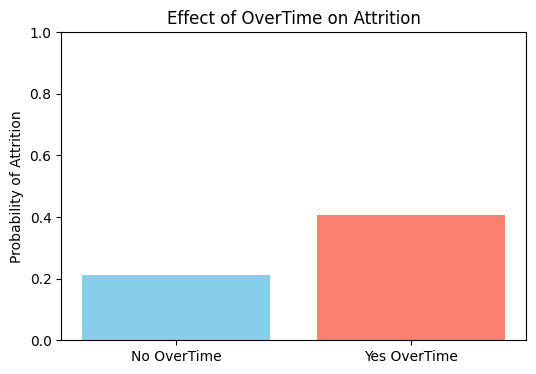

In [10]:
if "OverTime_Yes" in X_train.columns:
    X_base = X_test.iloc[0:1].copy()
    X_base = X_base.reindex(columns=X_train.columns, fill_value=0)

    X_no = X_base.copy()
    X_no["OverTime_Yes"] = 0
    prob_no = model.predict_proba(X_no)[:,1][0]

    X_yes = X_base.copy()
    X_yes["OverTime_Yes"] = 1
    prob_yes = model.predict_proba(X_yes)[:,1][0]

    plt.figure(figsize=(6,4))
    plt.bar(["No OverTime", "Yes OverTime"], [prob_no, prob_yes], color=["skyblue","salmon"])
    plt.ylabel("Probability of Attrition")
    plt.title("Effect of OverTime on Attrition")
    plt.ylim(0,1)
    plt.show()

### **Insight:**

Employees working **OverTime** have a significantly higher probability of leaving, highlighting the impact of work-life balance on retention.

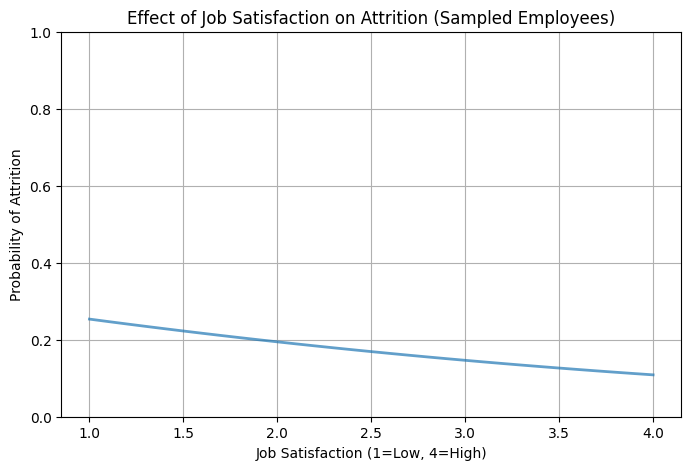

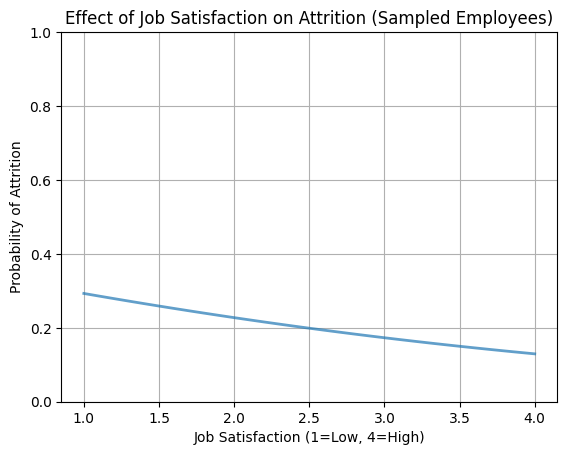

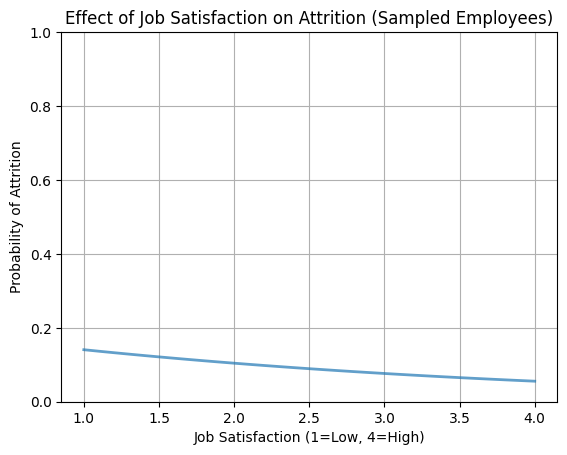

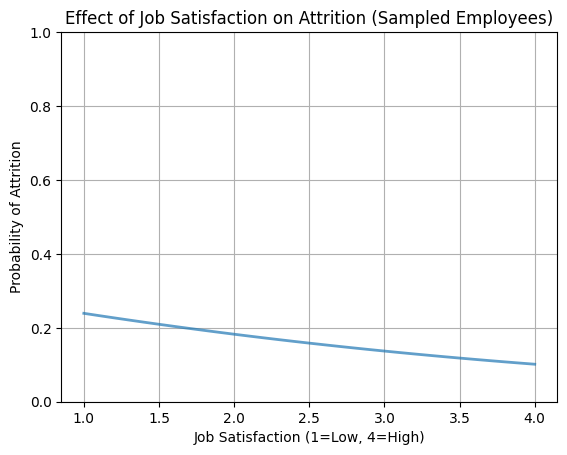

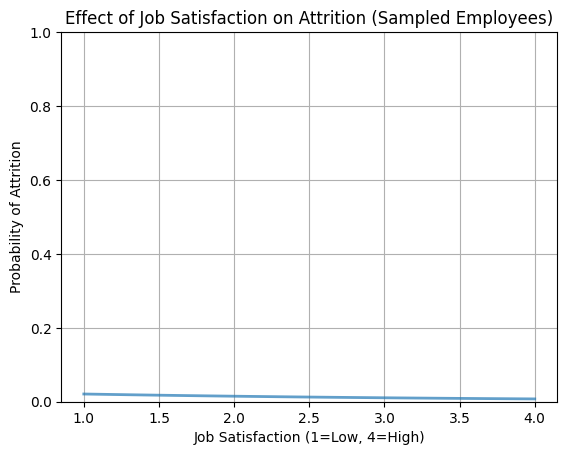

In [16]:
job_cols = [col for col in X_train.columns if "JobSatisfaction" in col]

if len(job_cols) == 1:
    job_satisfaction_range = np.arange(1, 4.1, 0.1)
    plt.figure(figsize=(8,5))

    X_sample = X_test.sample(5, random_state=42).copy()
    for idx, row in X_sample.iterrows():
        X_plot = pd.concat([row.to_frame().T]*len(job_satisfaction_range), ignore_index=True)
        X_plot['JobSatisfaction'] = job_satisfaction_range
        X_plot = X_plot.reindex(columns=X_train.columns, fill_value=0)
        probs = model.predict_proba(X_plot)[:,1]
        plt.plot(job_satisfaction_range, probs, linewidth=2, alpha=0.7)

        plt.xlabel("Job Satisfaction (1=Low, 4=High)")
        plt.ylabel("Probability of Attrition")
        plt.title("Effect of Job Satisfaction on Attrition (Sampled Employees)")
        plt.ylim(0,1)
        plt.grid(True)
        plt.show()

### Insight:

Higher **Job Satisfaction** generally lowers predicted attrition probability.
Variation across sampled employees show how satisfaction interacts with other factors like role and overtime.

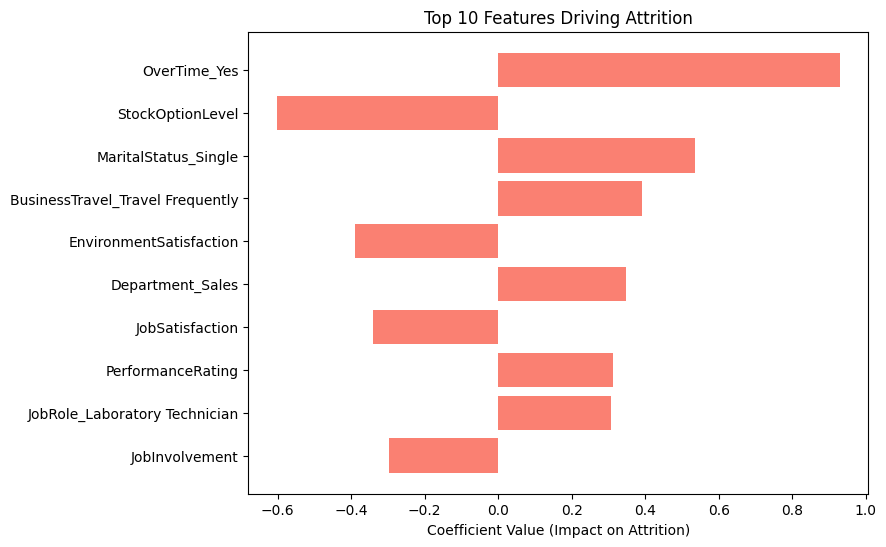

In [17]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
coefficients['Importance'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,6))
plt.barh(coefficients['Feature'].tail(10), coefficients['Coefficient'].tail(10), color="salmon")
plt.xlabel("Coefficient Value (Impact on Attrition)")
plt.title("Top 10 Features Driving Attrition")
plt.show()

### Insight:

The logistic regression feature importance chart identifies the strongest drivers of attrition:

- **OverTime_Yes** - strongest positive impact on leaving
- **Marital Status_Single** - singles are more likely to leave
- **Job Role_Laboratory Technician** - specific roles show higher attrition probability

*Other features like Job Satisfaction, Stock Option Level, and Department also influence attrition, but these three stand out as the most actionable for HR intervention*.

In [18]:
coefficients.tail(10)

,Feature,Coefficient,Importance
6,JobInvolvement,-0.298132,0.298132
34,JobRole_Laboratory Technician,0.307510,0.307510
13,PerformanceRating,0.312532,0.312532
8,JobSatisfaction,-0.341348,0.341348
26,Department_Sales,0.346570,0.346570
4,EnvironmentSatisfaction,-0.389813,0.389813
23,BusinessTravel_Travel Frequently,0.391467,0.391467
42,MaritalStatus_Single,0.534732,0.534732
15,StockOptionLevel,-0.602656,0.602656
43,OverTime_Yes,0.930450,0.930450


### Summary Takeaway

Overall, this predictive analysis shows that **OverTime, Job Satisfaction, and specific employee characteristics** like marital status and job role are key factors influencing attrition.
By combining descriptive dashboards with these predictive insights, HR teams can prioritize interventions, improve retention strategies, and focus on employees at higher risk of leaving.

This project demonstrates a full **data-to-insight workflow** from cleaning and modeling to visualization and actionable recommendations.